In [196]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

In [197]:
rated_bookings_file = './Datasets/rated_bookings.csv'
rb=pd.read_csv(rated_bookings_file)

In [198]:
#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])
rb.dtypes

# Group vehicle by Category

def func_case_vehicle(v):
    if v in ['Limo 8', 'SUV Limo', 'Limo 7']:
        return('Limo')
    if v in ['Sprinter 12', 'Van', 'Minibús de 20 plazas', 'Furgoneta de 14 plazas', 'Furgoneta de 10 plazas','Monovolumen de 7 plazas']:
        return('Van')
    else:
        return v

rb['vehicle_category']=rb['vehicle_type'].apply(func_case_vehicle)
rb[['vehicle_category','vehicle_type']]
rb


,booking_id,supplier,status,roundtrip_id,name,pickup_date,pickup_time,number_of_passenger,vehicle_type,total_price,total_comission,total_driver,special_notes,city_of_departure,booking_departure,booking_destination,route_type,route,address,hotel,flight_number,last_update_date,booking_date,rating_text,country,rating_score,rating_date,vehicle_category
0,T63989,NewDay,NaN,NaN,Sylvia,2014-09-19 21:00:00,21:00,3,SUV6,105.0,NaN,75.00,NaN,New York,Manhattan,Aeropuerto JFK,Ciudad - Aeropuerto,Manhattan - Aeropuerto JFK,200 West 56th street NYC 10019,the manhattan club,aeromexico am401,2023-11-01 10:45:00,2014-09-13 15:08:00,Excelente servicio los choferes muy atentos y ...,es,5,2014-09-25 13:36:00,SUV6
1,T64049,NewDay,NaN,NaN,Edgar,2014-09-15 22:35:00,22:35,5,SUV6,120.0,NaN,90.00,NaN,PORT OF SPAIN (TRINIDAD),Aeropuerto JFK,Manhattan,Aeropuerto - Ciudad,Aeropuerto JFK - Manhattan,"790 Seventh Avenue at 51st Street New York, NY...",THE MANHATTAN AT TIMES SQUARE HOTEL,CARIBBEAN AIRLINES BW 424,2023-11-01 10:45:00,2014-09-13 15:08:00,Excelente Servicio lo recomiendo 100%. Le brin...,es,5,2014-09-18 11:33:00,SUV6
2,T64060,NewDay,NaN,NaN,Martha,2014-10-03 13:50:00,13:50,5,SUV6,120.0,NaN,90.00,NaN,Guayaquil,Aeropuerto JFK,Manhattan,Aeropuerto - Ciudad,Aeropuerto JFK - Manhattan,104-40 106 st. Ozone Park NY 11417,NaN,?,2023-11-01 10:45:00,2014-09-13 15:08:00,NaN,es,5,2014-10-04 13:33:00,SUV6
3,T64076,NewDay,NaN,NaN,Miguel Gonzalo,2014-11-08 18:30:00,18:30,2,Sedan,80.0,NaN,55.00,Por favor chofer que hable español. Muchas gra...,New York,Manhattan,Aeropuerto JFK,Ciudad - Aeropuerto,Manhattan - Aeropuerto JFK,700 8th Avenue,ROW NYC,LAN PERÚ 2531,2018-05-28 14:12:00,2014-09-15 15:09:00,Muy buena atención lo recomiendo,es,5,2014-11-11 10:13:00,Sedan
4,T64553,NewDay,NaN,NaN,Ana Rosa,2014-09-30 03:00:00,03:00,2,Sedan,80.0,NaN,55.00,"Somo dos adultos mayores, el vuelo llega a las...",New York,Manhattan,Aeropuerto JFK,Ciudad - Aeropuerto,Manhattan - Aeropuerto JFK,"401 7th Ave,Nueva York",HOTEL PENNSYLVANIA,AVIANCA AV 021,2018-05-28 14:12:00,2014-09-17 15:09:00,excelente servicios con unos guias de habla hi...,es,5,2014-10-04 22:16:00,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,T1863398,Patricio,NaN,NaN,Heloisa,2024-02-03 04:00:00,04:00,4,SUV4,113.0,12.5,75.00,NaN,NaN,Manhattan,Aeropuerto LaGuardia,Ciudad - Aeropuerto,Manhattan - Aeropuerto LaGuardia,"Hilton Garden Inn New York/Midtown Park Ave, E...",NaN,Delta DL2098,2024-02-02 04:00:00,2024-02-01 23:24:00,O motorista não apareceu no horário combinadom...,pt,1,2024-02-03 15:20:00,SUV4
20119,T1863421,MarcoBPS,NaN,NaN,Laura,2024-02-03 16:00:00,16:00,2,Sedan,110.0,10.0,75.25,NaN,NaN,Manhattan,Aeropuerto JFK,Ciudad - Aeropuerto,Manhattan - Aeropuerto JFK,Fairfield Inn & Suites by Marriott New York Mi...,NaN,IBERIA IB6252,2024-02-02 19:04:00,2024-02-02 00:45:00,NaN,es,5,2024-02-05 07:33:00,Sedan
20120,T1864784,Patricio,NaN,NaN,Anne-hélène,2024-02-03 19:00:00,19:00,4,SUV6,139.0,12.5,95.25,NaN,NaN,Manhattan,Aeropuerto JFK,Ciudad - Aeropuerto,Manhattan - Aeropuerto JFK,SpringHill Suites by Marriott New York Midtown...,NaN,DELTA AIR LINES 8742,2024-02-02 23:25:00,2024-02-02 21:50:00,NaN,fr,5,2024-02-05 07:29:00,SUV6
20121,T1864828,HUGO,NaN,NaN,Milagros,2024-02-03 17:10:00,17:10,2,SUV4,132.0,12.5,90.00,NaN,St Marteen,Aeropuerto JFK,Manhattan,Aeropuerto - Ciudad,Aeropuerto JFK - Manhattan,"Park Lane Hotel New York, Central Park South, ...",NaN,Jet Blue 1088,2024-02-03 18:13:00,2024-02-03 03:22:00,NaN,es,5,2024-02-04 12:25:00,SUV4


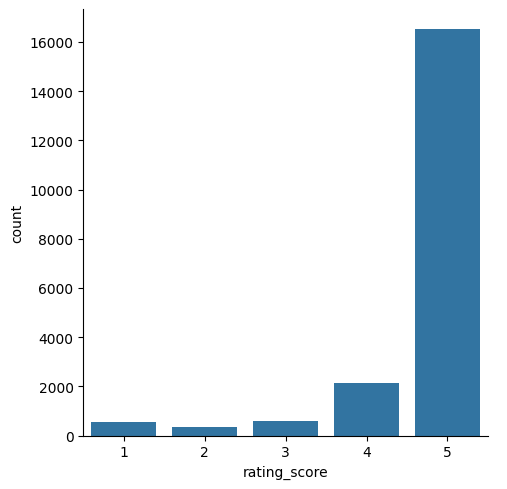

In [199]:
sns.catplot(rb, x='rating_score', kind='count')

<class 'pandas.core.frame.DataFrame'>


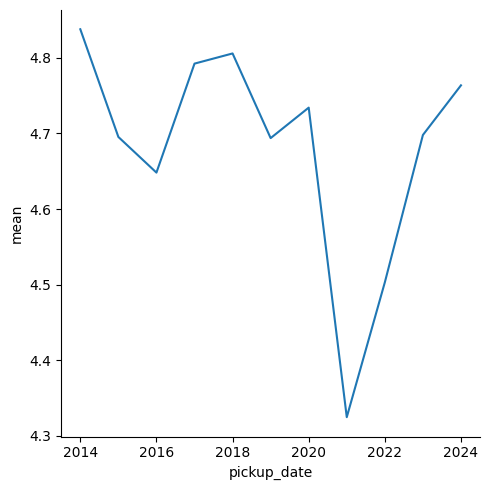

In [200]:
group=rb.groupby(rb['pickup_date'].dt.year)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
#g1['rating_score', 'sum']/g1['rating_score', 'count']
print(type(g1))
g1.columns= g1.columns.droplevel()

sns.relplot(data=g1, x='pickup_date', y='mean', kind="line")


<class 'pandas.core.frame.DataFrame'>


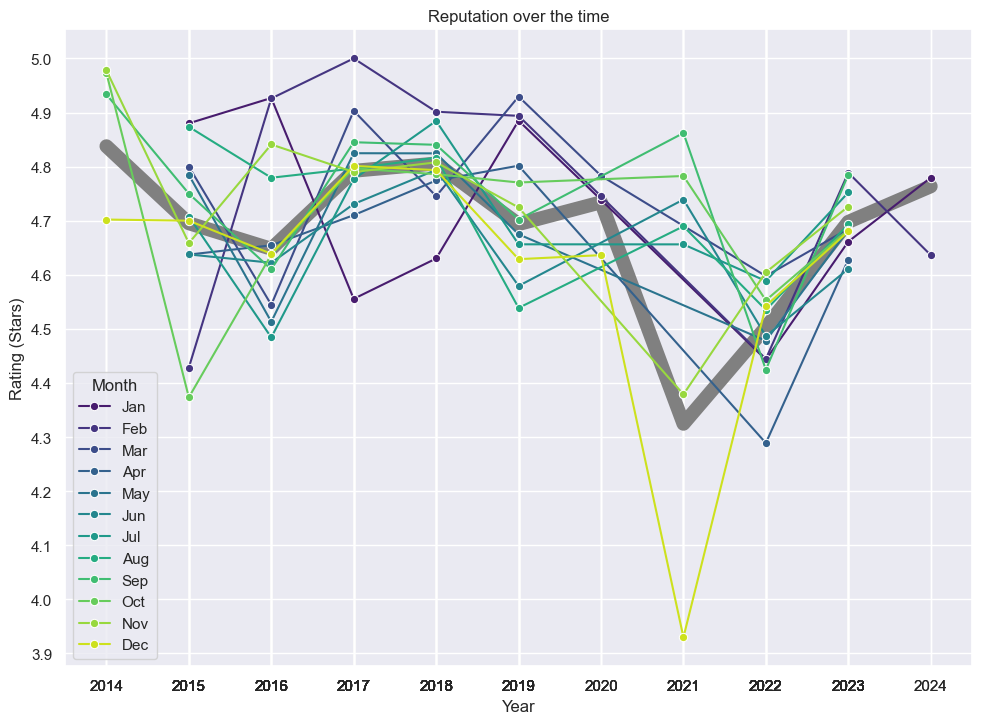

In [278]:

#Data by year
group1=rb.groupby(rb['pickup_date'].dt.year)
g1=group1.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
#g1['rating_score', 'sum']/g1['rating_score', 'count']
print(type(g1))
g1.columns= g1.columns.droplevel()
g1.reset_index()
g1=g1[(g1['count']>=10)]

ax=sns.lineplot(data=g1, x='pickup_date', y='mean', color='#808080', linewidth=10 )

#Data by year and months
import datetime as dt
group2=rb.groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
g2=group2.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g2.index.names=['year', 'month']
g2.columns= g2.columns.droplevel()
g2=g2.reset_index()
#converting numeric months to 3 letter months
g2['month']=g2['month'].apply(lambda x: dt.datetime.strptime(str(x),"%m").strftime("%b"))
#filtering out months with less than 10 values
g2=g2[(g2['count']>=10)]

#order for the hue
ordered_months=list(range(1,13))
ordered_month=map(lambda x: dt.datetime.strptime(str(x),"%m").strftime("%b") ,ordered_months)

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax= sns.lineplot(data=g2, x='year', y='mean', hue='month', hue_order=ordered_month, marker='o', palette=sns.color_palette("viridis", n_colors=12)) #'Paired'

ax.set(xticks=g2['year'])
ax.set(yticks=np.arange(3.9, 5.1, .1))
plt.title('Reputation over the time')
plt.legend(title='Month')
ax.set(xlabel='Year', ylabel='Rating (Stars)')

plt.show()

<Axes: xlabel='vehicle_category', ylabel='mean'>

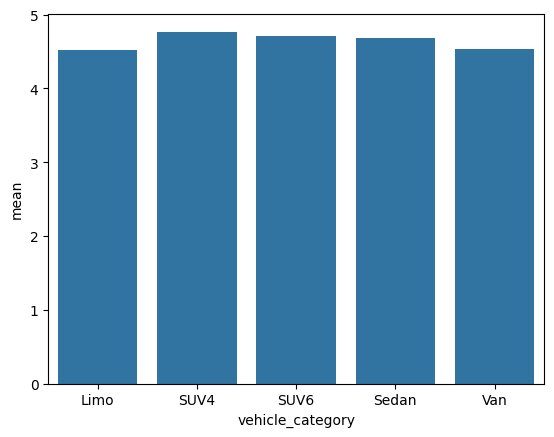

In [202]:
rb['vehicle_category']
group=rb.groupby(rb['vehicle_category'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()

sns.barplot(data=g1, x='vehicle_category',y='mean')